### Student Information
Name: 王士熏

Student ID: s1136102

GitHub ID: Hsun1128

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [3]:
### Begin Assignment Here
# Setup and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.data_mining_helpers as dmh

DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## Checkking Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [5]:
df.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

In [6]:
df.describe()

,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['type'].value_counts()

type
comment    783
post        64
Name: count, dtype: int64

## Missing values

In [8]:
# 只取有用的欄位
drop_cols = ['downvotes', 'upvote_ratio']
df = df.drop(columns=drop_cols)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   text          847 non-null    object 
 9   subjectivity  847 non-null    float64
 10  polarity      847 non-null    float64
 11  sentiment     847 non-null    float64
 12  entities      847 non-null    object 
 13  label         847 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 92.8+ KB


In [10]:
df.describe()

,upvotes,subjectivity,polarity,sentiment,label
count,847.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.346768,0.036116,0.144038,-0.243211
std,142.126337,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64

In [12]:
# 檢查所有欄位中是否有空字串 ''
for col in df.columns:
    empty_count = df[col].eq('').sum()
    
    if empty_count > 0:
        print(f"欄位 '{col}':")
        print(f"  空字串 '': {empty_count}")


In [13]:
# 檢查所有欄位中是否有 'nan', 'none', 'na' 這些字串（不區分大小寫）
check_values = ['nan', 'none', 'na']

for col in df.columns:
    for check_val in check_values:
        # 檢查小寫形式
        count = df[col].astype(str).str.lower().eq(check_val).sum()
        if count > 0:
            print(f"欄位 '{col}':")
            print(f"  '{check_val}': {count}")


## Duplicate data

In [14]:
# Check duplicate data
sum(df.duplicated())

0

In [15]:
sum(df.duplicated('title'))

720

In [16]:
sum(df.duplicated('text'))

23

In [17]:
sum(df.duplicated('url'))

696

In [18]:
df.drop_duplicates(['text'], keep='first', inplace=True)

In [19]:
sum(df.duplicated('text'))

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          824 non-null    object 
 1   datetime      824 non-null    object 
 2   post_id       824 non-null    object 
 3   subreddit     824 non-null    object 
 4   title         824 non-null    object 
 5   author        824 non-null    object 
 6   url           824 non-null    object 
 7   upvotes       824 non-null    int64  
 8   text          824 non-null    object 
 9   subjectivity  824 non-null    float64
 10  polarity      824 non-null    float64
 11  sentiment     824 non-null    float64
 12  entities      824 non-null    object 
 13  label         824 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 96.6+ KB


## Data Preprocessing

In [21]:
df_sample = df.sample(n=400)

In [22]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 763 to 565
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          400 non-null    object 
 1   datetime      400 non-null    object 
 2   post_id       400 non-null    object 
 3   subreddit     400 non-null    object 
 4   title         400 non-null    object 
 5   author        400 non-null    object 
 6   url           400 non-null    object 
 7   upvotes       400 non-null    int64  
 8   text          400 non-null    object 
 9   subjectivity  400 non-null    float64
 10  polarity      400 non-null    float64
 11  sentiment     400 non-null    float64
 12  entities      400 non-null    object 
 13  label         400 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 46.9+ KB


In [23]:
# check sample data
print(f"資料筆數: {len(df_sample)}")
print(f"各類別分布:")
print(df_sample.type.value_counts())
df_sample.head()

資料筆數: 400
各類別分布:
type
comment    382
post        18
Name: count, dtype: int64


,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
763,post,2025-03-21 19:35:33,1jgpf67,stockstobuytoday,Commitment of Trader Report for the Week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,2,&#x200B;\n\n[]()\n\n&#x200B;\n\n The Commitmen...,0.283333,0.000,0.0,"['CFTC', 'U.S.', 'Futures', 'Commission', 'the...",0.0
662,comment,2025-03-04 23:42:54,mg1zjxj,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,bladezdivide,https://www.reddit.com/r/stocks/comments/1j0w7...,2,High risk high beta portfolio but it's 50% uni...,0.540000,0.160,1.0,"['amazon', 'portfolio', 'reddit', '%', 'beta',...",0.0
571,comment,2025-04-11 8:56:36,mmj70oq,StockMarket,🚨China responds to Trump’s 145% tariff with an...,asianmandan,https://i.redd.it/2f7y4h6226ue1.jpeg,6,Why stop there? Why not one million percent?,0.000000,0.000,0.0,['percent'],0.0
16,comment,2025-04-10 16:34:19,mmew0jm,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,hotgarbagevideo,https://www.reddit.com/r/stocks/comments/1jvzr...,1,Jesus Christ,0.000000,0.000,0.0,"['Jesus', 'Christ']",-1.0
553,comment,2025-04-11 9:11:13,mmj8deh,stocks,BREAKING: China raises tariffs on U.S. goods t...,friendly_gentleman,https://www.reddit.com/r/stocks/comments/1jwku...,-74,Jaime diamond said this like 2 days ago in an ...,0.575000,-0.125,-1.0,"['interview', 'Jaime', 'diamond']",0.0


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

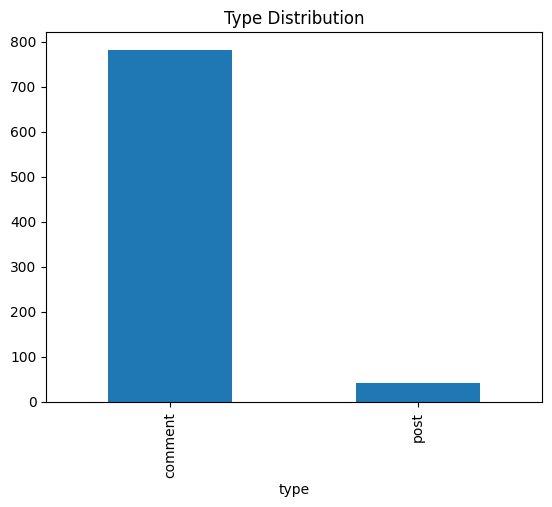

In [25]:
df.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

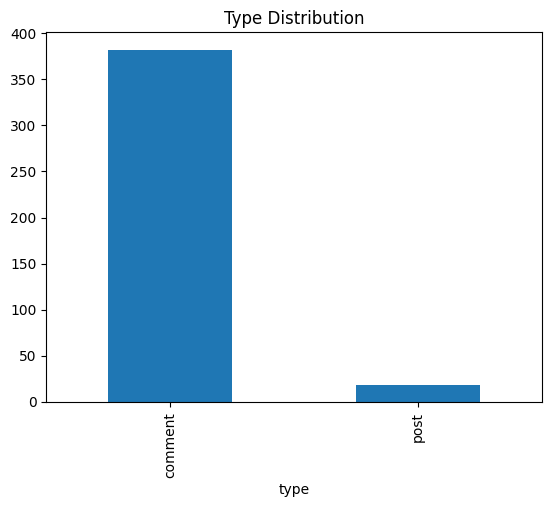

In [26]:
df_sample.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

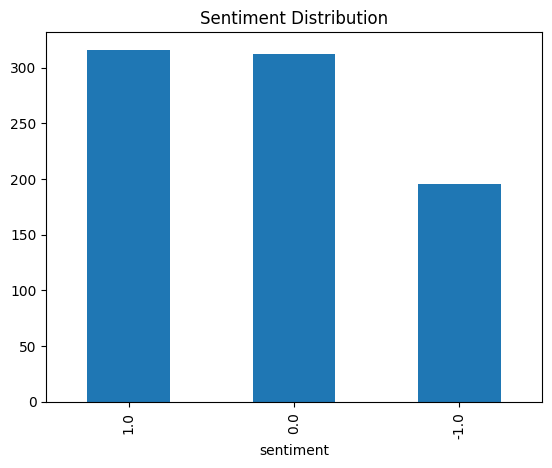

In [27]:
df.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

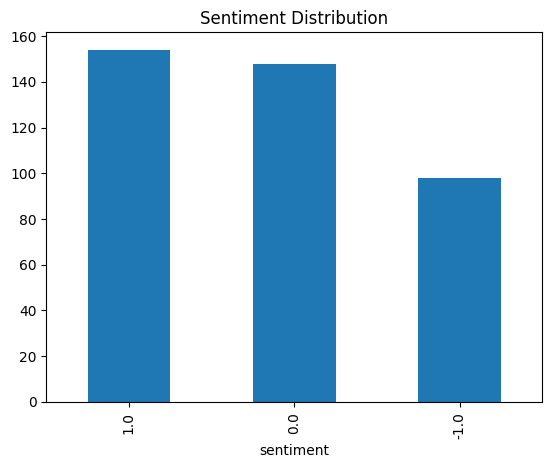

In [28]:
df_sample.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

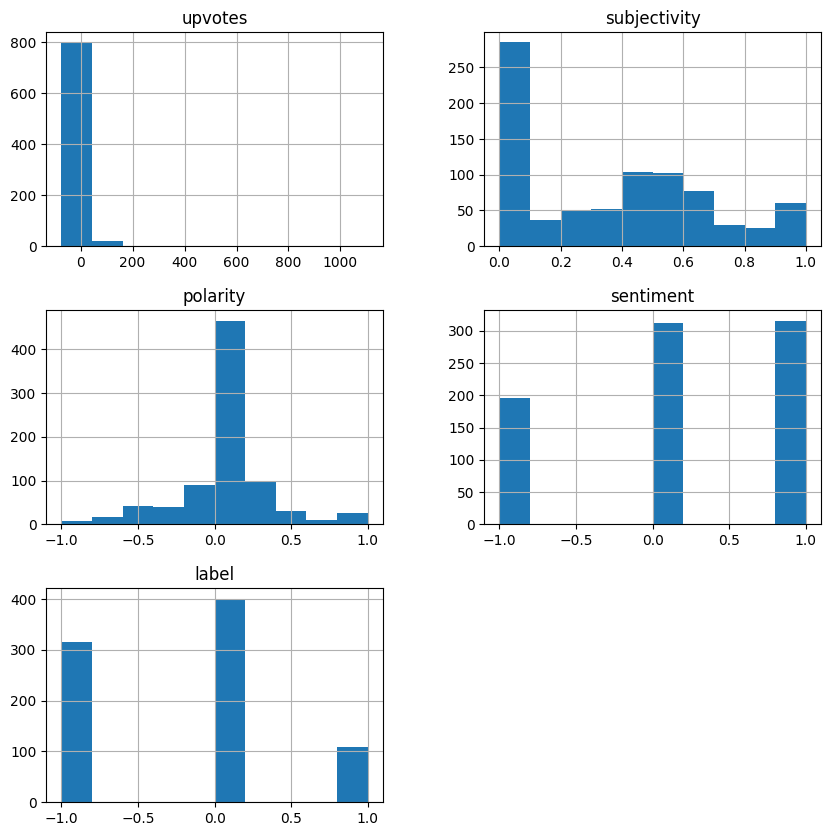

In [29]:
df.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

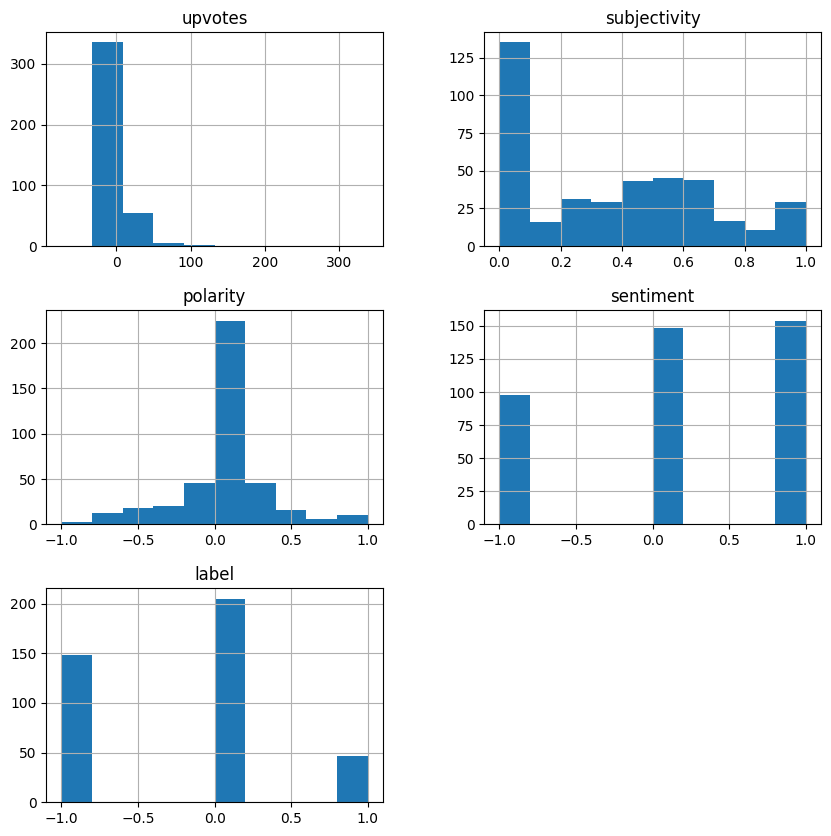

In [30]:
df_sample.hist(figsize=(10, 10))

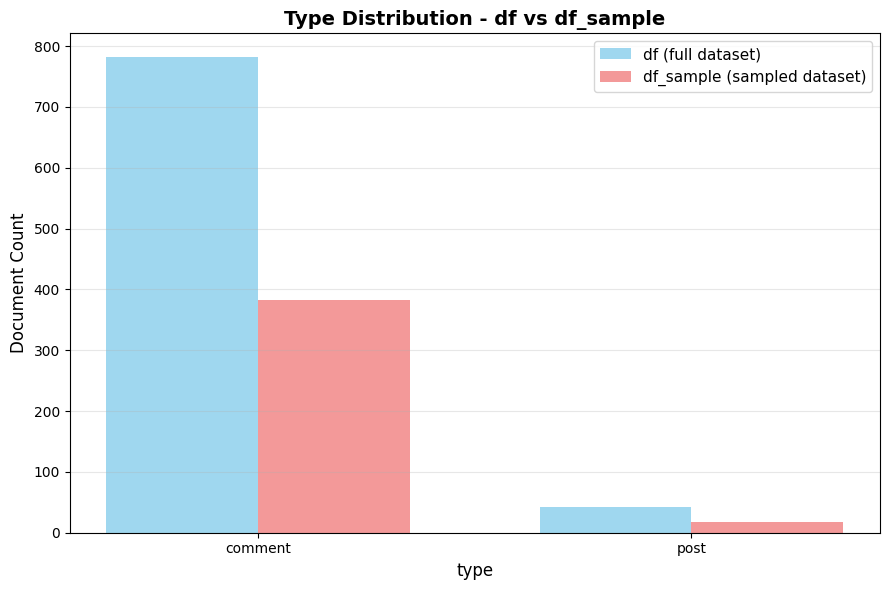

Type 分布詳細比較:
--------------------------------------------------
comment              | df:  782 | df_sample: 382 | 比例: 48.8%
post                 | df:   42 | df_sample:  18 | 比例: 42.9%


In [31]:
# Answer here
# 準備資料進行並排比較
df_counts = df.type.value_counts()
df_sample_counts = df_sample.type.value_counts()

# 確保兩個資料集有相同的類別順序
categories = df_counts.index
x_pos = np.arange(len(categories))

# 設定圖表大小
plt.figure(figsize=(9, 6))

# 設定長條圖的寬度
bar_width = 0.35

# 繪製並排長條圖
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# 設定圖表標題和標籤
plt.title('Type Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('type', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# 設定 x 軸標籤
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# 加入圖例
plt.legend(fontsize=11)

# 調整版面
plt.tight_layout()

# 顯示網格
plt.grid(axis='y', alpha=0.3)

# 顯示圖表
plt.show()

# 印出具體數值比較
print("Type 分布詳細比較:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | 比例: {percentage:.1f}%")



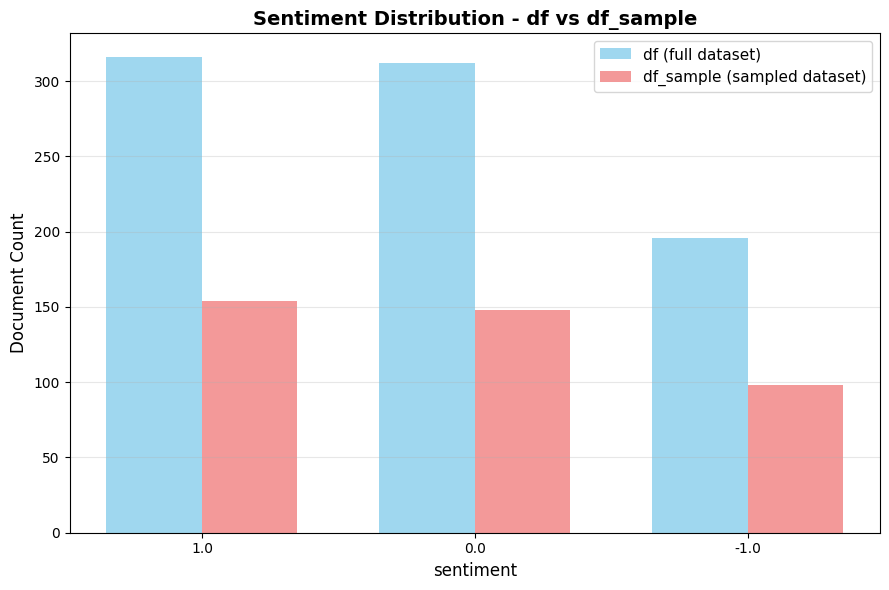

Sentiment 分布詳細比較:
--------------------------------------------------
                 1.0 | df:  316 | df_sample: 154 | 比例: 48.7%
                 0.0 | df:  312 | df_sample: 148 | 比例: 47.4%
                -1.0 | df:  196 | df_sample:  98 | 比例: 50.0%


In [32]:
# Answer here
# 準備資料進行並排比較
df_counts = df.sentiment.value_counts()
df_sample_counts = df_sample.sentiment.value_counts()

# 確保兩個資料集有相同的類別順序
categories = df_counts.index
x_pos = np.arange(len(categories))

# 設定圖表大小
plt.figure(figsize=(9, 6))

# 設定長條圖的寬度
bar_width = 0.35

# 繪製並排長條圖
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# 設定圖表標題和標籤
plt.title('Sentiment Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# 設定 x 軸標籤
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# 加入圖例
plt.legend(fontsize=11)

# 調整版面
plt.tight_layout()

# 顯示網格
plt.grid(axis='y', alpha=0.3)

# 顯示圖表
plt.show()

# 印出具體數值比較
print("Sentiment 分布詳細比較:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | 比例: {percentage:.1f}%")



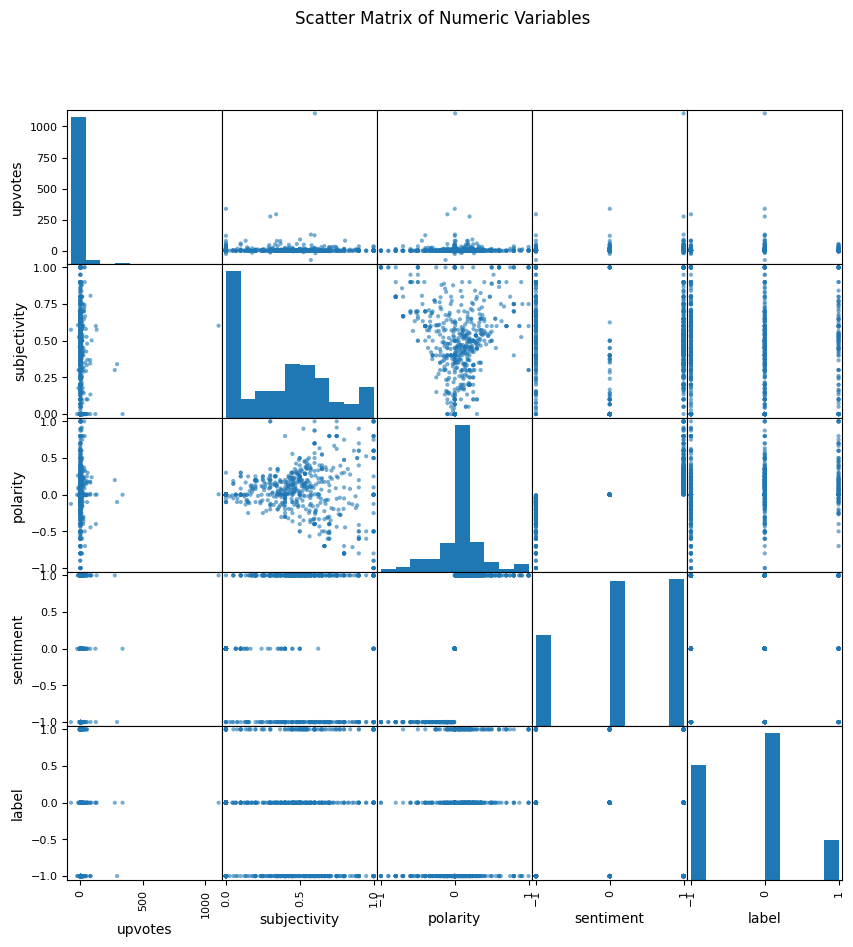

In [33]:
from pandas.plotting import scatter_matrix

# 選擇主要數值欄位創建散點圖矩陣
selected_cols = ['upvotes', 'subjectivity', 'polarity', 'sentiment', 'label']
df_numeric = df[selected_cols]

scatter_matrix(df_numeric, figsize=(10, 10), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix of Numeric Variables')
plt.show()

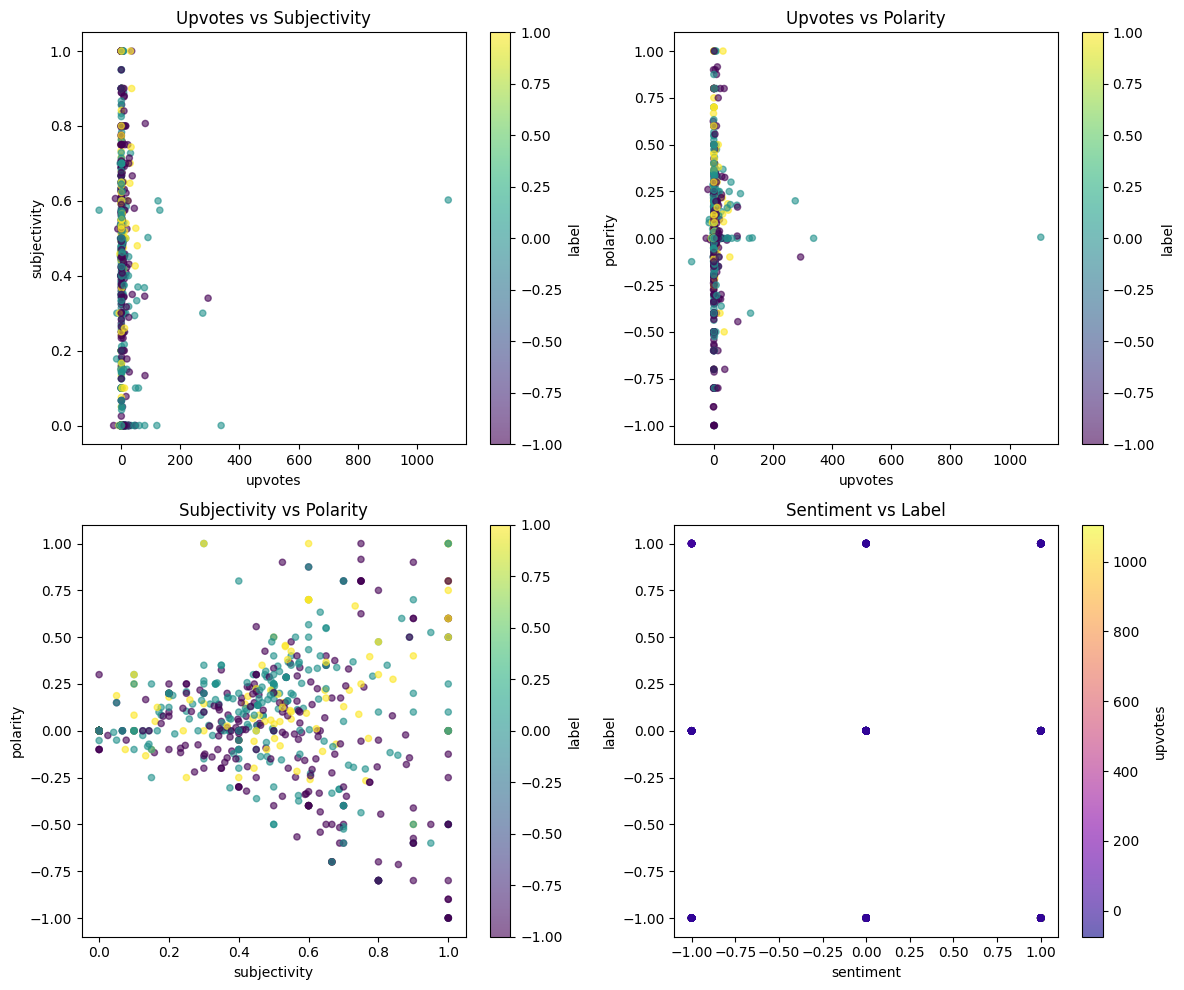

In [34]:
# 創建散點圖矩陣
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# upvotes vs subjectivity
df.plot.scatter(x='upvotes', y='subjectivity', c='label', colormap='viridis', 
                ax=axes[0,0], alpha=0.6)
axes[0,0].set_title('Upvotes vs Subjectivity')

# upvotes vs polarity
df.plot.scatter(x='upvotes', y='polarity', c='label', colormap='viridis', 
                ax=axes[0,1], alpha=0.6)
axes[0,1].set_title('Upvotes vs Polarity')

# subjectivity vs polarity
df.plot.scatter(x='subjectivity', y='polarity', c='label', colormap='viridis', 
                ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('Subjectivity vs Polarity')

# sentiment vs label
df.plot.scatter(x='sentiment', y='label', c='upvotes', colormap='plasma', 
                ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Sentiment vs Label')

plt.tight_layout()
plt.show()

## Feature Creation

In [35]:
import nltk

# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [36]:
df['unigrams'].head()

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

In [37]:
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didn, ’, t, say, thank, you, .]"


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [39]:
count_vect.get_feature_names_out()[887]

'company'

In [40]:
count_vect.get_feature_names_out()[132]

'50x'

In [41]:
analyze = count_vect.build_analyzer()
df.iloc[0]['text']
analyze(df.iloc[0]['text'])

['calls', 'on', 'retards']

In [42]:
df_counts.shape

(824, 4346)

In [43]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [44]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [45]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [46]:
count_vect.get_feature_names_out()[0:2]

array(['00', '000'], dtype=object)

In [47]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [48]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [49]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

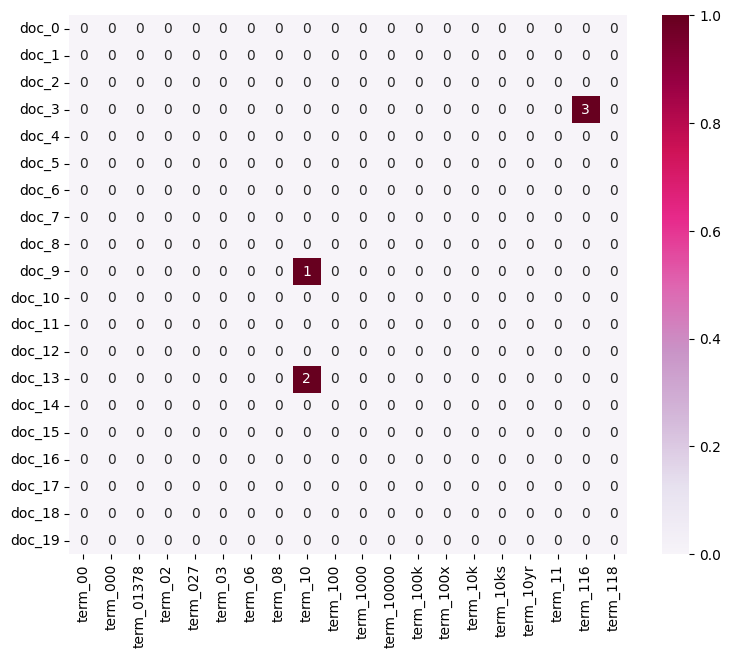

In [50]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

詞彙表大小: 4346
文檔數量: 824


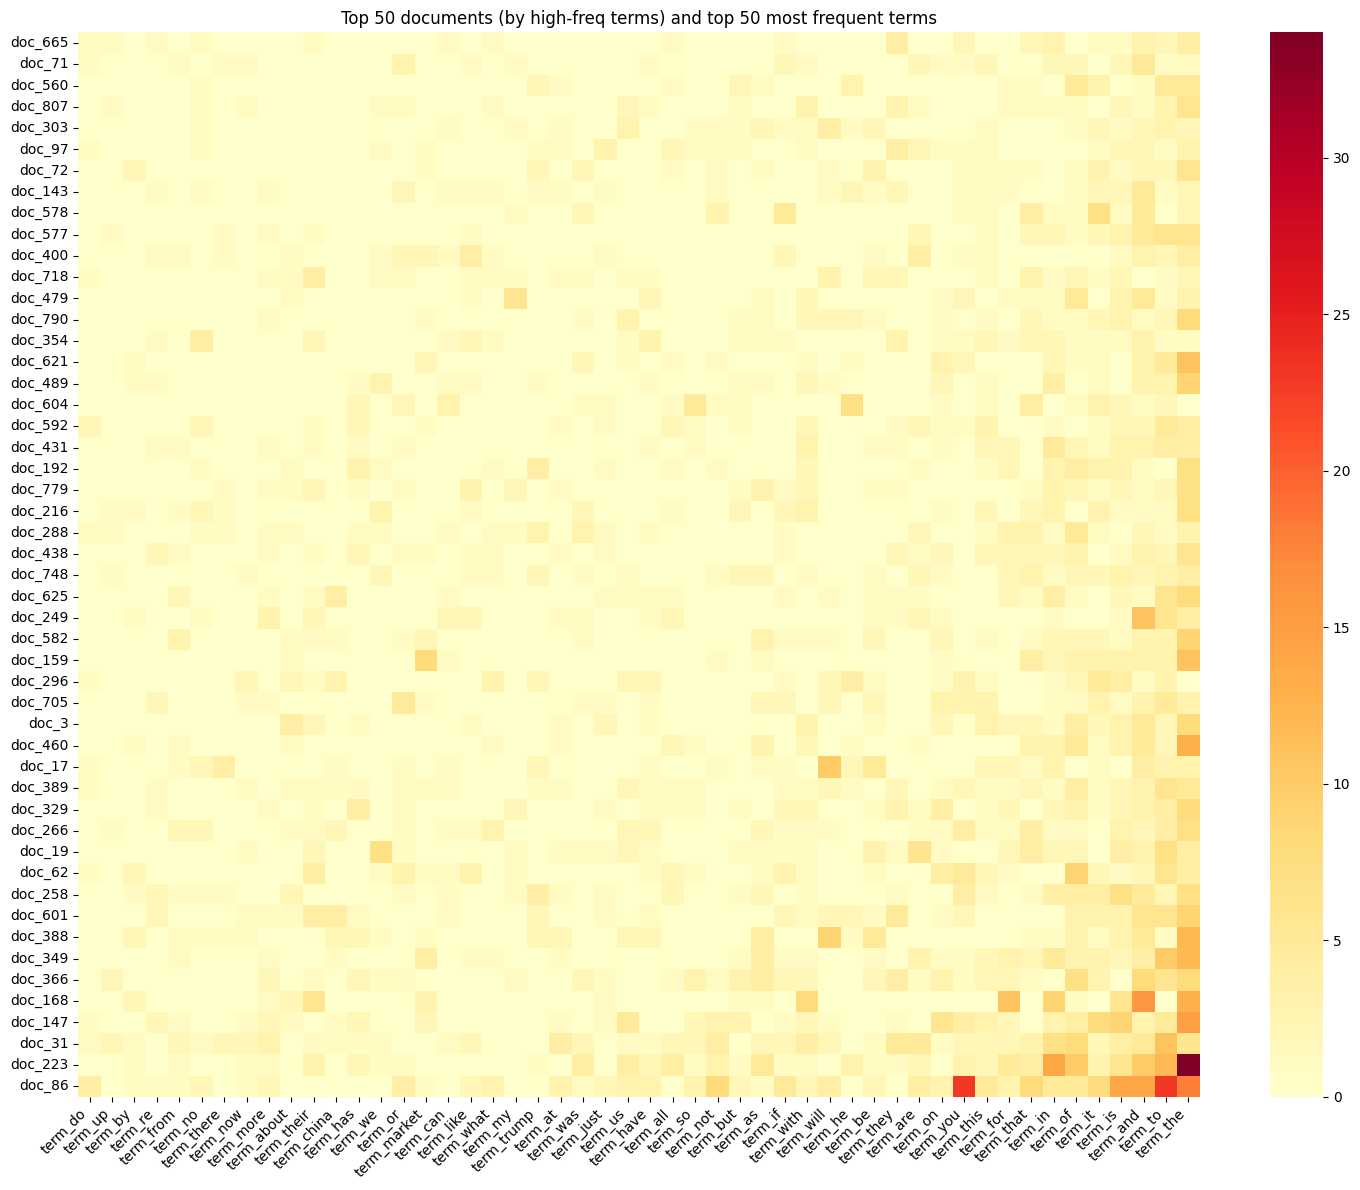

選中的文檔索引: [665  71 560 807 303  97  72 143 578 577 400 718 479 790 354 621 489 604
 592 431 192 779 216 288 438 748 625 249 582 159 296 705   3 460  17 389
 329 266  19  62 258 601 388 349 366 168 147  31 223  86]
選中的詞項索引: [1212 4071  680 3107 1639 2645 3854 2665 2544  175 3849  796 1837 4198
 2737 2424  697 2310 4224 2580 3977  406 4183 2197 4087 1842  289 3544
 2659  675  388 1987 4271 4255 1846  486 3858  374 2706 4333 3866 1604
 3846 2024 2687 2161 2149  327 3911 3848]

為了獲得有用且美觀的視覺化效果，我使用的方法包括：
1. 選擇性抽樣：選取詞頻最高的50個詞項和包含這些詞項最多的50個文檔
2. 智慧型過濾：避免顯示過於稀疏的區域，專注於數據密集的部分
3. 關閉數值標註：當矩陣較大時避免文字重疊
4. 使用適合的色彩映射：YlOrRd色彩方案在表示頻率數據時更為直觀
5. 添加適當的標題：提高圖表的可讀性


In [51]:
# Answer here

# 為了有效率地視覺化整個詞項-文檔矩陣，我會使用以下方法：

# 找出詞頻最高的50個詞項，並選擇包含這些詞項最多的50個文檔
print("詞彙表大小:", df_counts.shape[1])
print("文檔數量:", df_counts.shape[0])

# 計算每個詞項的總頻率
term_freq_sums = np.asarray(df_counts.sum(axis=0)).flatten()

# 選擇出現頻率最高的前50個詞項
top_terms_idx = np.argsort(term_freq_sums)[-50:]
top_term_names = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_terms_idx]]

# 計算每個文檔中這50個高頻詞項的總出現次數
top_terms_matrix = df_counts[:, top_terms_idx]
doc_scores = np.array(top_terms_matrix.sum(axis=1)).flatten()

# 選擇包含這些高頻詞項最多的前50個文檔
top_docs_idx = np.argsort(doc_scores)[-50:]
top_doc_names = ["doc_"+ str(i) for i in top_docs_idx]

# 提取對應的子矩陣 - 包含高頻詞項最多的50個文檔 × 詞頻最高的50個詞項
plot_z_large = df_counts[top_docs_idx, :][:, top_terms_idx].toarray()

# 創建更大的熱力圖
plt.figure(figsize=(15, 12))
df_large = pd.DataFrame(plot_z_large, columns=top_term_names, index=top_doc_names)
ax = sns.heatmap(df_large, 
                 cmap="YlOrRd", 
                 vmin=0, 
                 vmax=np.max(plot_z_large),
                 annot=False,  # 關閉數值標註以避免過度擁擠
                 cbar=True)
plt.title("Top 50 documents (by high-freq terms) and top 50 most frequent terms")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"選中的文檔索引: {top_docs_idx}")
print(f"選中的詞項索引: {top_terms_idx}")

print("\n為了獲得有用且美觀的視覺化效果，我使用的方法包括：")
print("1. 選擇性抽樣：選取詞頻最高的50個詞項和包含這些詞項最多的50個文檔")
print("2. 智慧型過濾：避免顯示過於稀疏的區域，專注於數據密集的部分")
print("3. 關閉數值標註：當矩陣較大時避免文字重疊")
print("4. 使用適合的色彩映射：YlOrRd色彩方案在表示頻率數據時更為直觀")
print("5. 添加適當的標題：提高圖表的可讀性")



### Transform Text Data


In [52]:
term_frequencies = np.asarray(df_counts.sum(axis=0)).flatten()

term_frequencies

array([4, 6, 1, ..., 1, 1, 1], shape=(4346,))

/tmp/ipykernel_17025/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


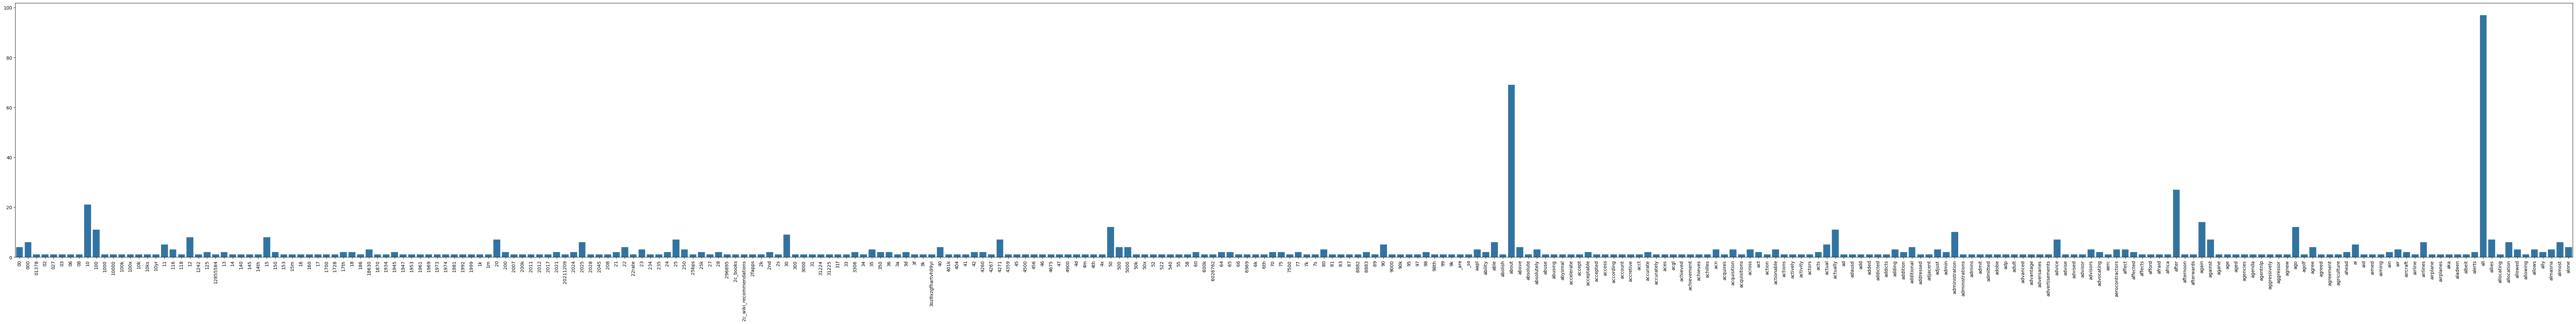

In [53]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [54]:
import plotly.express as px
import plotly.graph_objects as go

# 準備資料供plotly使用
df_terms = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# 建立互動式長條圖
fig = px.bar(df_terms, 
             x='terms', 
             y='frequency',
             title='詞彙頻率互動式視覺化 (前300個詞彙)',
             labels={'terms': '詞彙', 'frequency': '頻率'},
             hover_data={'frequency': True})

# 調整圖表樣式
fig.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

# 顯示圖表
fig.show()


In [55]:
# Answer here
# 只顯示前200個最高頻率的詞彙
top_200_indices = np.argsort(term_frequencies)[-200:][::-1]
top_200_terms = count_vect.get_feature_names_out()[top_200_indices]
top_200_values = term_frequencies[top_200_indices]

# 準備前200高頻詞彙資料
df_top_200 = pd.DataFrame({
    'terms': top_200_terms,
    'frequency': top_200_values
})

print(f"顯示前200個最高頻率的詞彙")

# 建立前200高頻詞彙視覺化
fig_top_200 = px.bar(df_top_200, 
                     x='terms', 
                     y='frequency',
                     title='前200個最高頻率詞彙視覺化',
                     labels={'terms': '詞彙', 'frequency': '頻率'},
                     hover_data={'frequency': True})

fig_top_200.update_layout(
    width=1000,
    height=500,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_top_200.show()


顯示前200個最高頻率的詞彙


In [56]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_17025/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



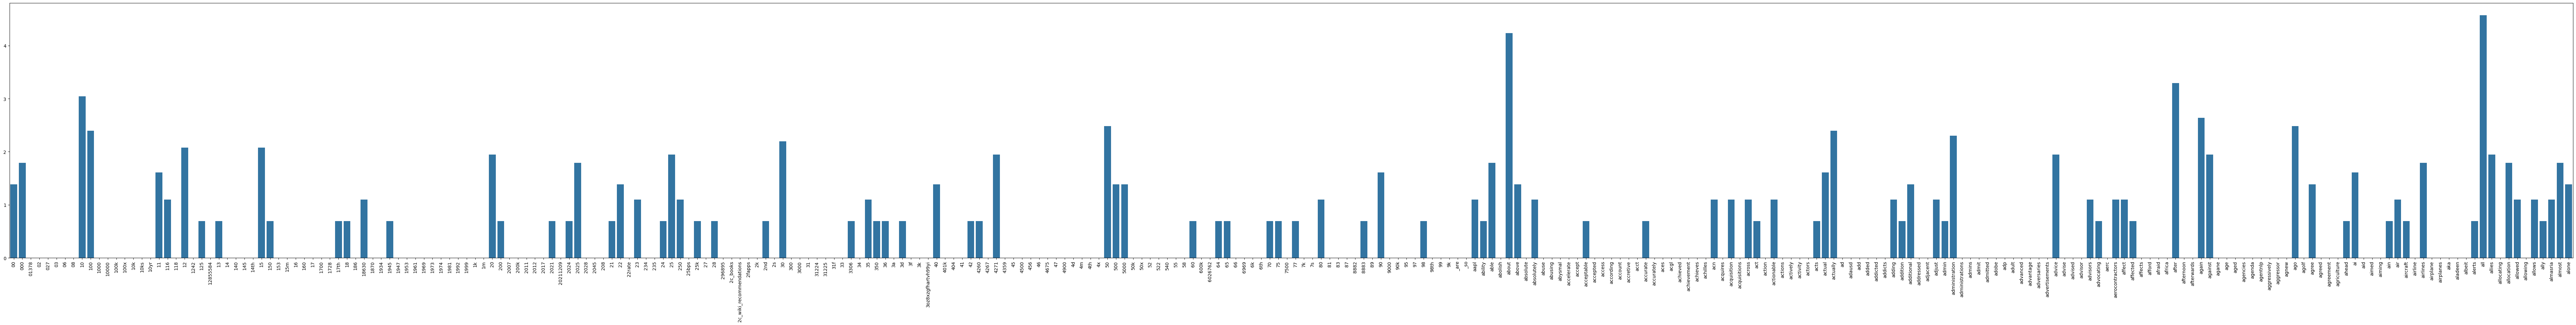

In [57]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [58]:
# 創建包含詞彙、對數頻率和排名的DataFrame
terms_log_data = []
for i, term in enumerate(count_vect.get_feature_names_out()):
    terms_log_data.append({
        'terms': term,
        'log_frequency': term_frequencies_log[i],
        'rank': i + 1
    })

df_terms_log = pd.DataFrame(terms_log_data)

# 根據對數頻率排序（由高到低）
df_sorted_log = df_terms_log.sort_values('log_frequency', ascending=False).reset_index(drop=True)
df_sorted_log['rank'] = range(1, len(df_sorted_log) + 1)

# 取前300個詞彙進行視覺化
df_sorted_log_top300 = df_sorted_log.head(300)

# 根據對數頻率排序詞彙（由高到低）
fig_terms_sorted_log = px.bar(df_sorted_log_top300, 
                              x='terms', 
                              y='log_frequency',
                              title='詞彙對數頻率視覺化 - 按對數頻率排序 (前300個詞彙)',
                              labels={'terms': '詞彙', 'log_frequency': '詞彙對數頻率'},
                              hover_data={'log_frequency': True, 'rank': True})

fig_terms_sorted_log.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_terms_sorted_log.show()

# 對數分佈的統計分析
top_300_log_frequencies = df_sorted_log_top300['log_frequency'].values
top_300_log_terms = df_sorted_log_top300['terms'].values

# 計算前10%和後10%詞彙的平均對數頻率
top_10_percent_count_log = int(300 * 0.1)
top_10_percent_avg_log = np.mean(top_300_log_frequencies[:top_10_percent_count_log])
bottom_10_percent_avg_log = np.mean(top_300_log_frequencies[-top_10_percent_count_log:])

print(f"\n對數頻率長尾效應分析:")
print(f"前10%詞彙的平均對數頻率: {top_10_percent_avg_log:.2f}")
print(f"後10%詞彙的平均對數頻率: {bottom_10_percent_avg_log:.2f}")
print(f"對數頻率差異: {top_10_percent_avg_log - bottom_10_percent_avg_log:.2f}")
print(f"最高對數頻率詞彙: '{top_300_log_terms[0]}' (對數頻率: {top_300_log_frequencies[0]:.2f})")
print(f"第300高對數頻率詞彙: '{top_300_log_terms[299]}' (對數頻率: {top_300_log_frequencies[299]:.2f})")

# 觀察到的差異和洞察：
print("\n=== 對數分佈與原始頻率分佈的差異分析 ===")
print("1. 視覺化差異:")
print("   - 對數轉換後，高頻率和低頻率詞彙之間的差距被壓縮")
print("   - 原本極端的長尾分佈變得更加平滑和易於觀察")
print("   - y軸的尺度從數千級別變為個位數級別")

print("\n2. 分佈特性:")
print("   - 原始頻率呈現典型的冪律分佈（Power Law）")
print("   - 對數轉換後呈現更接近線性的遞減趨勢")
print("   - 有助於識別中等頻率詞彙的重要性")

print("\n3. 實際洞察:")
print("   - 對數分佈有助於平衡高頻和低頻詞彙的重要性")
print("   - 在信息檢索中，TF-IDF等算法就使用了對數轉換")
print("   - 對數轉換可以減少極高頻詞彙（如停用詞）的主導效應")
print("   - 更容易識別具有中等重要性但被高頻詞彙掩蓋的詞彙")

print("\n4. 應用場景:")
print("   - 文本分析：平衡詞彙重要性，避免高頻詞主導")
print("   - 特徵工程：對數轉換常用於處理偏態分佈的特徵")
print("   - 資料視覺化：使極端值的影響降低，更易於觀察整體模式")





對數頻率長尾效應分析:
前10%詞彙的平均對數頻率: 5.12
後10%詞彙的平均對數頻率: 2.33
對數頻率差異: 2.80
最高對數頻率詞彙: 'the' (對數頻率: 6.79)
第300高對數頻率詞彙: 'idea' (對數頻率: 2.30)

=== 對數分佈與原始頻率分佈的差異分析 ===
1. 視覺化差異:
   - 對數轉換後，高頻率和低頻率詞彙之間的差距被壓縮
   - 原本極端的長尾分佈變得更加平滑和易於觀察
   - y軸的尺度從數千級別變為個位數級別

2. 分佈特性:
   - 原始頻率呈現典型的冪律分佈（Power Law）
   - 對數轉換後呈現更接近線性的遞減趨勢
   - 有助於識別中等頻率詞彙的重要性

3. 實際洞察:
   - 對數分佈有助於平衡高頻和低頻詞彙的重要性
   - 在信息檢索中，TF-IDF等算法就使用了對數轉換
   - 對數轉換可以減少極高頻詞彙（如停用詞）的主導效應
   - 更容易識別具有中等重要性但被高頻詞彙掩蓋的詞彙

4. 應用場景:
   - 文本分析：平衡詞彙重要性，避免高頻詞主導
   - 特徵工程：對數轉換常用於處理偏態分佈的特徵
   - 資料視覺化：使極端值的影響降低，更易於觀察整體模式


# Phase 2

In [59]:
## Phase 2: Finding Frequent Patterns, Classification, and TF-IDF

### 5.4 Finding Frequent Patterns

首先，我們需要建立詞項-文檔頻率矩陣（term-document frequency matrix）。這個矩陣會將每個文檔表示為詞彙的頻率向量。


In [60]:
# 建立詞項-文檔矩陣
# 使用 df_sample 資料集，並將 sentiment 作為類別
# 將 sentiment 轉換為字串類別名稱
df_sample['category_name'] = df_sample['sentiment'].map({
    1.0: 'positive',
    0.0: 'neutral',
    -1.0: 'negative'
})

# 準備資料
X = df_sample[['text', 'sentiment', 'category_name']].copy()
X['category'] = X['sentiment'].map({1.0: 0, 0.0: 1, -1.0: 2})  # 數值編碼

print(f"資料集大小: {len(X)}")
print(f"\n類別分布:")
print(X['category_name'].value_counts())


資料集大小: 400

類別分布:
category_name
positive    154
neutral     148
negative     98
Name: count, dtype: int64


In [61]:
# 為每個類別建立詞項-文檔矩陣
from sklearn.feature_extraction.text import CountVectorizer

categories = X['category_name'].unique()
print(f"類別: {categories}\n")

# 為每個類別創建詞項-文檔矩陣
term_document_dfs = {}

for category in categories:
    # 取得該類別的所有文本
    category_texts = X[X['category_name'] == category]['text']
    
    # 使用 CountVectorizer 建立詞項-文檔矩陣
    count_vect_cat = CountVectorizer()
    X_counts_cat = count_vect_cat.fit_transform(category_texts)
    
    # 轉換為 DataFrame
    term_document_df = pd.DataFrame(
        X_counts_cat.toarray(),
        columns=count_vect_cat.get_feature_names_out(),
        index=category_texts.index
    )
    
    term_document_dfs[category] = term_document_df
    
    print(f"{category} 類別:")
    print(f"  - 文檔數量: {term_document_df.shape[0]}")
    print(f"  - 詞彙數量: {term_document_df.shape[1]}")
    print()


類別: ['neutral' 'positive' 'negative']

neutral 類別:
  - 文檔數量: 148
  - 詞彙數量: 750

positive 類別:
  - 文檔數量: 154
  - 詞彙數量: 1909

negative 類別:
  - 文檔數量: 98
  - 詞彙數量: 1012



#### 過濾高頻和低頻詞彙

根據 Master 的方法，我們需要過濾掉頻率過高（停用詞）和過低（雜訊）的詞彙。


In [62]:
# 過濾高頻和低頻詞彙的函數
def filter_top_bottom_words_by_sum(term_document_df, bottom_percent=0.01, top_percent=0.05):
    """
    過濾詞項-文檔矩陣中的高頻和低頻詞彙
    
    參數:
    - term_document_df: 詞項-文檔頻率矩陣
    - bottom_percent: 要過濾的低頻詞彙百分比（預設 1%）
    - top_percent: 要過濾的高頻詞彙百分比（預設 5%）
    """
    # 計算每個詞彙在所有文檔中的總頻率
    word_sums = term_document_df.sum(axis=0).sort_values()
    
    # 計算要過濾的詞彙數量
    total_words = len(word_sums)
    bottom_n = int(total_words * bottom_percent)
    top_n = int(total_words * top_percent)
    
    # 找出要移除的詞彙
    words_to_remove = list(word_sums.head(bottom_n).index) + list(word_sums.tail(top_n).index)
    
    # 顯示被過濾的詞彙
    print(f'Bottom {bottom_percent*100}% words (前5個):')
    print(word_sums.head(min(5, bottom_n)))
    print(f'\nTop {top_percent*100}% words (前5個):')
    print(word_sums.tail(min(5, top_n)))
    print(f'\n總共移除 {len(words_to_remove)} 個詞彙\n')
    
    # 返回過濾後的 DataFrame
    return term_document_df.drop(columns=words_to_remove)

# 對每個類別應用過濾
filt_term_document_dfs = {}

for category in categories:
    print(f'=== {category} 類別 ===')
    filt_term_document_dfs[category] = filter_top_bottom_words_by_sum(
        term_document_dfs[category],
        bottom_percent=0.01,
        top_percent=0.05
    )
    print(f"過濾後詞彙數量: {filt_term_document_dfs[category].shape[1]}\n")


=== neutral 類別 ===
Bottom 1.0% words (前5個):
nope       1
moving     1
muslims    1
naming     1
need       1
dtype: int64

Top 5.0% words (前5個):
and    19
it     26
is     30
to     44
the    49
dtype: int64

總共移除 44 個詞彙

過濾後詞彙數量: 706

=== positive 類別 ===
Bottom 1.0% words (前5個):
350     1
36      1
3d      1
401k    1
42      1
dtype: int64

Top 5.0% words (前5個):
it      88
is      94
and    137
to     150
the    208
dtype: int64

總共移除 114 個詞彙

過濾後詞彙數量: 1795

=== negative 類別 ===
Bottom 1.0% words (前5個):
note      1
months    1
move      1
moves     1
myself    1
dtype: int64

Top 5.0% words (前5個):
it      39
is      52
and     63
to      77
the    124
dtype: int64

總共移除 60 個詞彙

過濾後詞彙數量: 952



#### 轉換為 Transactional Database

接下來，我們需要將詞項-文檔矩陣轉換為 PAMI 函式庫可以使用的交易資料庫格式。


In [63]:
# 安裝 PAMI 函式庫（如果尚未安裝）
# !pip install pami

# 將過濾後的詞項-文檔矩陣轉換為交易資料庫
from PAMI.extras.convert.DF2DB import DF2DB

for category in categories:
    # 將類別名稱中的點替換為底線（避免檔案名稱錯誤）
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"正在處理 {category} 類別...")
    
    # 創建 DF2DB 物件並轉換為交易資料庫
    # 閾值設定為 >= 1，表示詞彙至少出現一次就納入交易
    obj = DF2DB(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_reddit_{category_safe}.csv', '>=', 1)
    
    print(f"已保存為: td_freq_db_reddit_{category_safe}.csv\n")


正在處理 neutral 類別...
已保存為: td_freq_db_reddit_neutral.csv

正在處理 positive 類別...
已保存為: td_freq_db_reddit_positive.csv

正在處理 negative 類別...
已保存為: td_freq_db_reddit_negative.csv



#### 檢查交易資料庫統計資訊

讓我們查看每個類別的交易資料庫統計資訊，以便決定適當的最小支持度（minimum support）閾值。



類別: neutral
Database size (total no of transactions) : 146
Number of items : 706
Minimum Transaction Size : 1
Average Transaction Size : 6.6438356164383565
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 5.542784679236179
Variance in Transaction Sizes : 30.934341048653756
Sparsity : 0.9905894679653847


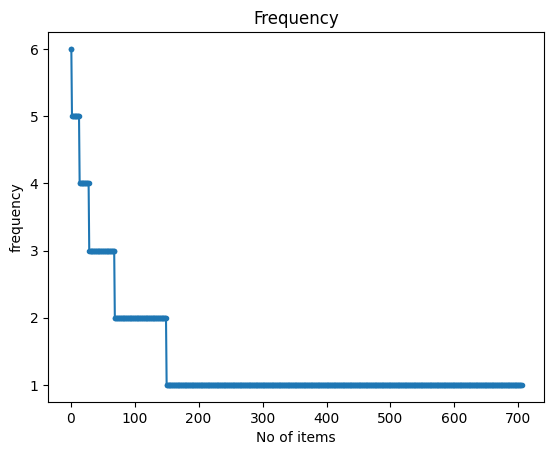

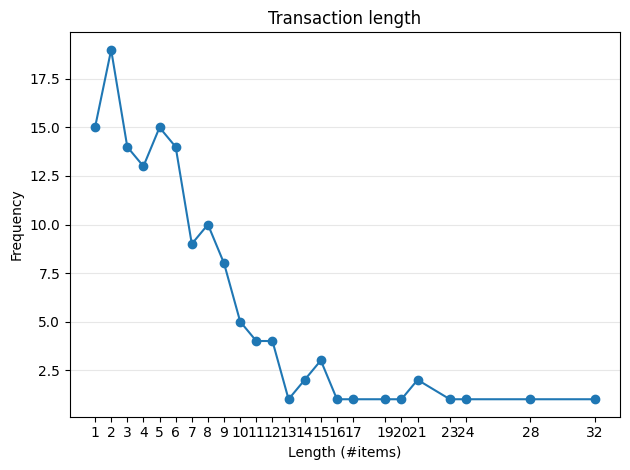


類別: positive
Database size (total no of transactions) : 154
Number of items : 1795
Minimum Transaction Size : 1
Average Transaction Size : 17.850649350649352
Maximum Transaction Size : 208
Standard Deviation Transaction Size : 25.000462974292958
Variance in Transaction Sizes : 629.108267549444
Sparsity : 0.9900553485511703


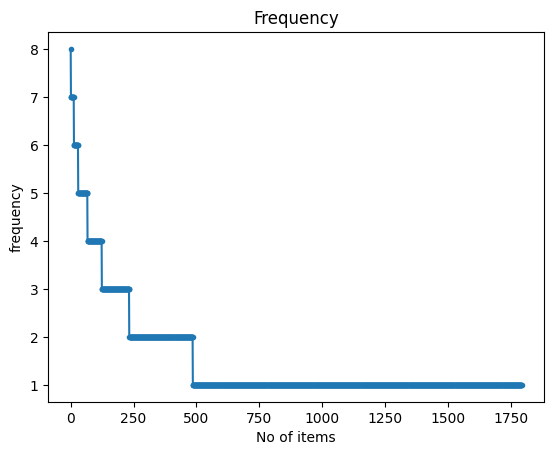

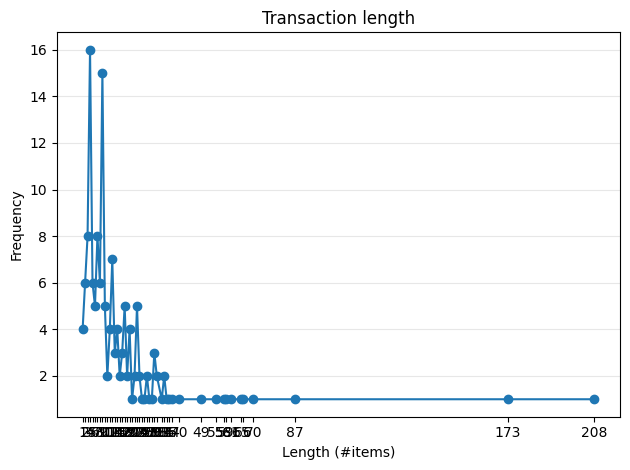


類別: negative
Database size (total no of transactions) : 97
Number of items : 952
Minimum Transaction Size : 1
Average Transaction Size : 14.948453608247423
Maximum Transaction Size : 72
Standard Deviation Transaction Size : 12.699030837296627
Variance in Transaction Sizes : 162.9452319587629
Sparsity : 0.9842978428484795


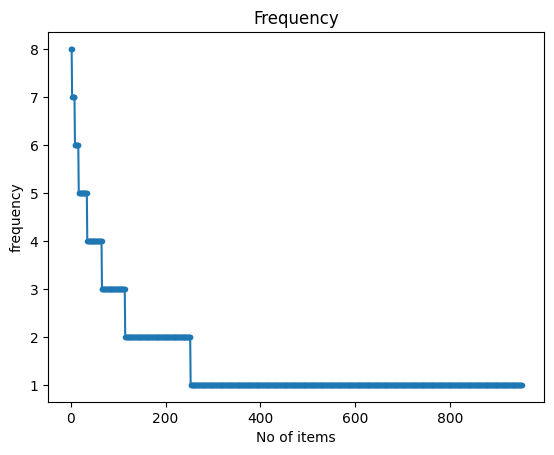

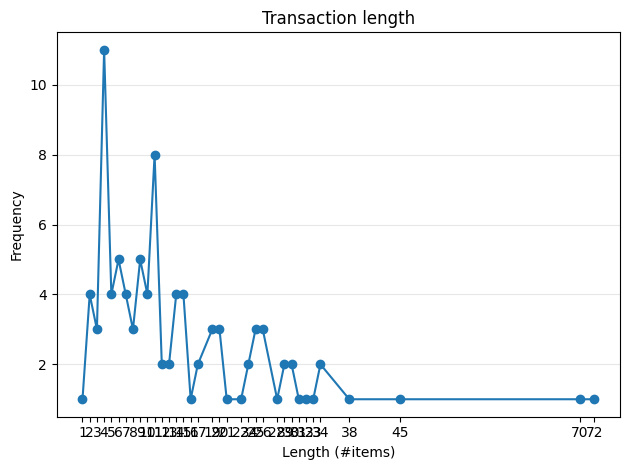

In [64]:
# 檢查每個類別的交易資料庫統計資訊
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in categories:
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"\n{'='*80}")
    print(f"類別: {category}")
    print(f"{'='*80}")
    
    obj = tds.TransactionalDatabase(f'td_freq_db_reddit_{category_safe}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()


#### 使用 FPGrowth 挖掘頻繁模式

根據統計資訊，我們設定最小支持度為 5（因為 Reddit 資料集相對較小）。


In [65]:
# 使用 FPGrowth 演算法挖掘頻繁模式
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 5  # 設定最小支持度
frequentPatternsDFs = {}

for category in categories:
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"\n{'='*80}")
    print(f"正在挖掘 {category} 類別的頻繁模式...")
    print(f"{'='*80}")
    
    # 創建 FPGrowth 物件並挖掘頻繁模式
    obj = alg.FPGrowth(
        iFile=f'td_freq_db_reddit_{category_safe}.csv',
        minSup=minSup
    )
    obj.mine()
    
    # 獲取頻繁模式並保存
    frequentPatternsDFs[category] = obj.getPatternsAsDataFrame()
    obj.save(f'freq_patterns_reddit_{category_safe}_minSup{minSup}.txt')
    
    print(f'總頻繁模式數量: {len(frequentPatternsDFs[category])}')
    print(f'運行時間: {obj.getRuntime():.4f} 秒')
    print(f'已保存為: freq_patterns_reddit_{category_safe}_minSup{minSup}.txt')
    
    # 顯示前10個模式
    print(f"\n前10個頻繁模式:")
    print(frequentPatternsDFs[category].head(10))



正在挖掘 neutral 類別的頻繁模式...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總頻繁模式數量: 14
運行時間: 0.0011 秒
已保存為: freq_patterns_reddit_neutral_minSup5.txt

前10個頻繁模式:
  Patterns  Support
0      one        5
1    there        5
2       go        5
3   should        5
4     from        5
5    going        5
6      can        5
7       us        5
8    china        5
9      don        5

正在挖掘 positive 類別的頻繁模式...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總頻繁模式數量: 67
運行時間: 0.0027 秒
已保存為: freq_patterns_reddit_positive_minSup5.txt

前10個頻繁模式:
   Patterns  Support
0        30        5
1        50        5
2      love        5
3    target        5
4   tariffs        5
5      said        5
6  anything        5
7      most        5
8       did        5
9     every        5

正在挖掘 negative 類別的頻繁模式...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總頻繁模式數量: 36
運行時間: 0.0015 秒
已保存為: freq_patterns_re

#### 識別並保留每個類別的 Unique Patterns

為了提升分類效果，我們只保留每個類別特有的模式（在其他類別中不出現的模式）。


In [66]:
# 識別每個類別的 unique patterns
# 統計每個 pattern 出現在多少個類別中
pattern_counts = {}
for category, df in frequentPatternsDFs.items():
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# 只保留在單一類別中出現的 patterns
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# 計算統計資訊
total_patterns_count = sum(len(df) for df in frequentPatternsDFs.values())
discarded_patterns_count = total_patterns_count - len(unique_patterns)

print(f"總模式數量: {total_patterns_count}")
print(f"Unique 模式數量: {len(unique_patterns)}")
print(f"捨棄的模式數量: {discarded_patterns_count}")
print(f"保留比例: {len(unique_patterns)/total_patterns_count*100:.2f}%\n")

# 為每個類別過濾 patterns
filtered_dfs = []
for category, df in frequentPatternsDFs.items():
    filtered_df = df[df['Patterns'].isin(unique_patterns)].copy()
    filtered_df['category'] = category  # 添加類別標籤
    filtered_dfs.append(filtered_df)
    print(f"{category}: {len(df)} -> {len(filtered_df)} patterns (保留 {len(filtered_df)/len(df)*100:.1f}%)")

# 合併所有過濾後的 patterns
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(f"\n最終 unique patterns 數量: {len(final_pattern_df)}")
print(f"\n前20個 patterns:")
print(final_pattern_df.head(20))


總模式數量: 117
Unique 模式數量: 95
捨棄的模式數量: 22
保留比例: 81.20%

neutral: 14 -> 8 patterns (保留 57.1%)
positive: 67 -> 59 patterns (保留 88.1%)
negative: 36 -> 28 patterns (保留 77.8%)

最終 unique patterns 數量: 95

前20個 patterns:
   Patterns  Support  category
93     fuck        8  negative
92     than        8  negative
94     only        8  negative
66    could        8  positive
59     much        7  positive
60      out        7  positive
62      new        7  positive
57     been        7  positive
58      day        7  positive
56     same        7  positive
61     well        7  positive
85       an        7  negative
63      buy        7  positive
64   better        7  positive
65    point        7  positive
89      why        7  negative
90      too        7  negative
86     more        7  negative
88       we        7  negative
91   market        7  negative


#### 使用 Patterns 擴增原始資料

現在我們將把這些 unique patterns 轉換為二進位特徵，並與原始的詞項-文檔矩陣結合。


In [67]:
# 建立完整資料集的詞項-文檔矩陣（用於後續分類）
count_vect_full = CountVectorizer()
X_tdm_full = count_vect_full.fit_transform(X['text'])
terms_full = count_vect_full.get_feature_names_out()

# 將 TDM 轉換為 DataFrame
tdm_df = pd.DataFrame(X_tdm_full.toarray(), columns=terms_full, index=X.index)

print(f"完整 TDM 形狀: {tdm_df.shape}")
print(f"文檔數量: {tdm_df.shape[0]}")
print(f"詞彙數量: {tdm_df.shape[1]}")


完整 TDM 形狀: (400, 2758)
文檔數量: 400
詞彙數量: 2758


In [68]:
# 將文本分詞為集合（用於檢查 pattern 是否存在）
X['tokenized_text'] = X['text'].str.split().apply(set)

# 初始化 pattern 矩陣
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'].unique())

print("正在建立 pattern 矩陣...")
# 對每個 pattern 檢查是否存在於每個文檔中
for pattern in final_pattern_df['Patterns'].unique():
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

print(f"Pattern 矩陣形狀: {pattern_matrix.shape}")
print(f"Pattern 數量: {pattern_matrix.shape[1]}")

# 檢查有多少文檔包含至少一個 pattern
docs_with_patterns = (pattern_matrix.sum(axis=1) > 0).sum()
print(f"包含至少一個 pattern 的文檔數量: {docs_with_patterns} / {len(X)} ({docs_with_patterns/len(X)*100:.1f}%)")


正在建立 pattern 矩陣...
Pattern 矩陣形狀: (400, 95)
Pattern 數量: 95
包含至少一個 pattern 的文檔數量: 250 / 400 (62.5%)


In [69]:
# 合併原始 TDM 和 pattern 矩陣
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(f"\n擴增後的資料形狀: {augmented_df.shape}")
print(f"原始特徵數量: {tdm_df.shape[1]}")
print(f"Pattern 特徵數量: {pattern_matrix.shape[1]}")
print(f"總特徵數量: {augmented_df.shape[1]}")

# 顯示前幾行
print(f"\n擴增資料前5行:")
augmented_df.head()



擴增後的資料形狀: (400, 2853)
原始特徵數量: 2758
Pattern 特徵數量: 95
總特徵數量: 2853

擴增資料前5行:


,000,01378,02,027,03,06,10,100,10000,100k,...,would,really,mean,when,time,take,even,see,some,more\tthan
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.5 Dimensionality Reduction（降維視覺化）

我們將使用 PCA、t-SNE 和 UMAP 三種降維方法，並比較使用原始 TDM 和擴增資料的效果。


In [70]:
# 使用原始 TDM 進行降維
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

print("正在進行降維（這可能需要幾分鐘）...\n")

# 對原始 TDM 進行降維
print("原始 TDM 降維中...")
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

print("原始 TDM 降維完成！\n")

# 對擴增資料進行降維
print("擴增資料降維中...")
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

print("擴增資料降維完成！")


正在進行降維（這可能需要幾分鐘）...

原始 TDM 降維中...


/home/s1136102/.conda/envs/datamining/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



原始 TDM 降維完成！

擴增資料降維中...


/home/s1136102/.conda/envs/datamining/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



擴增資料降維完成！


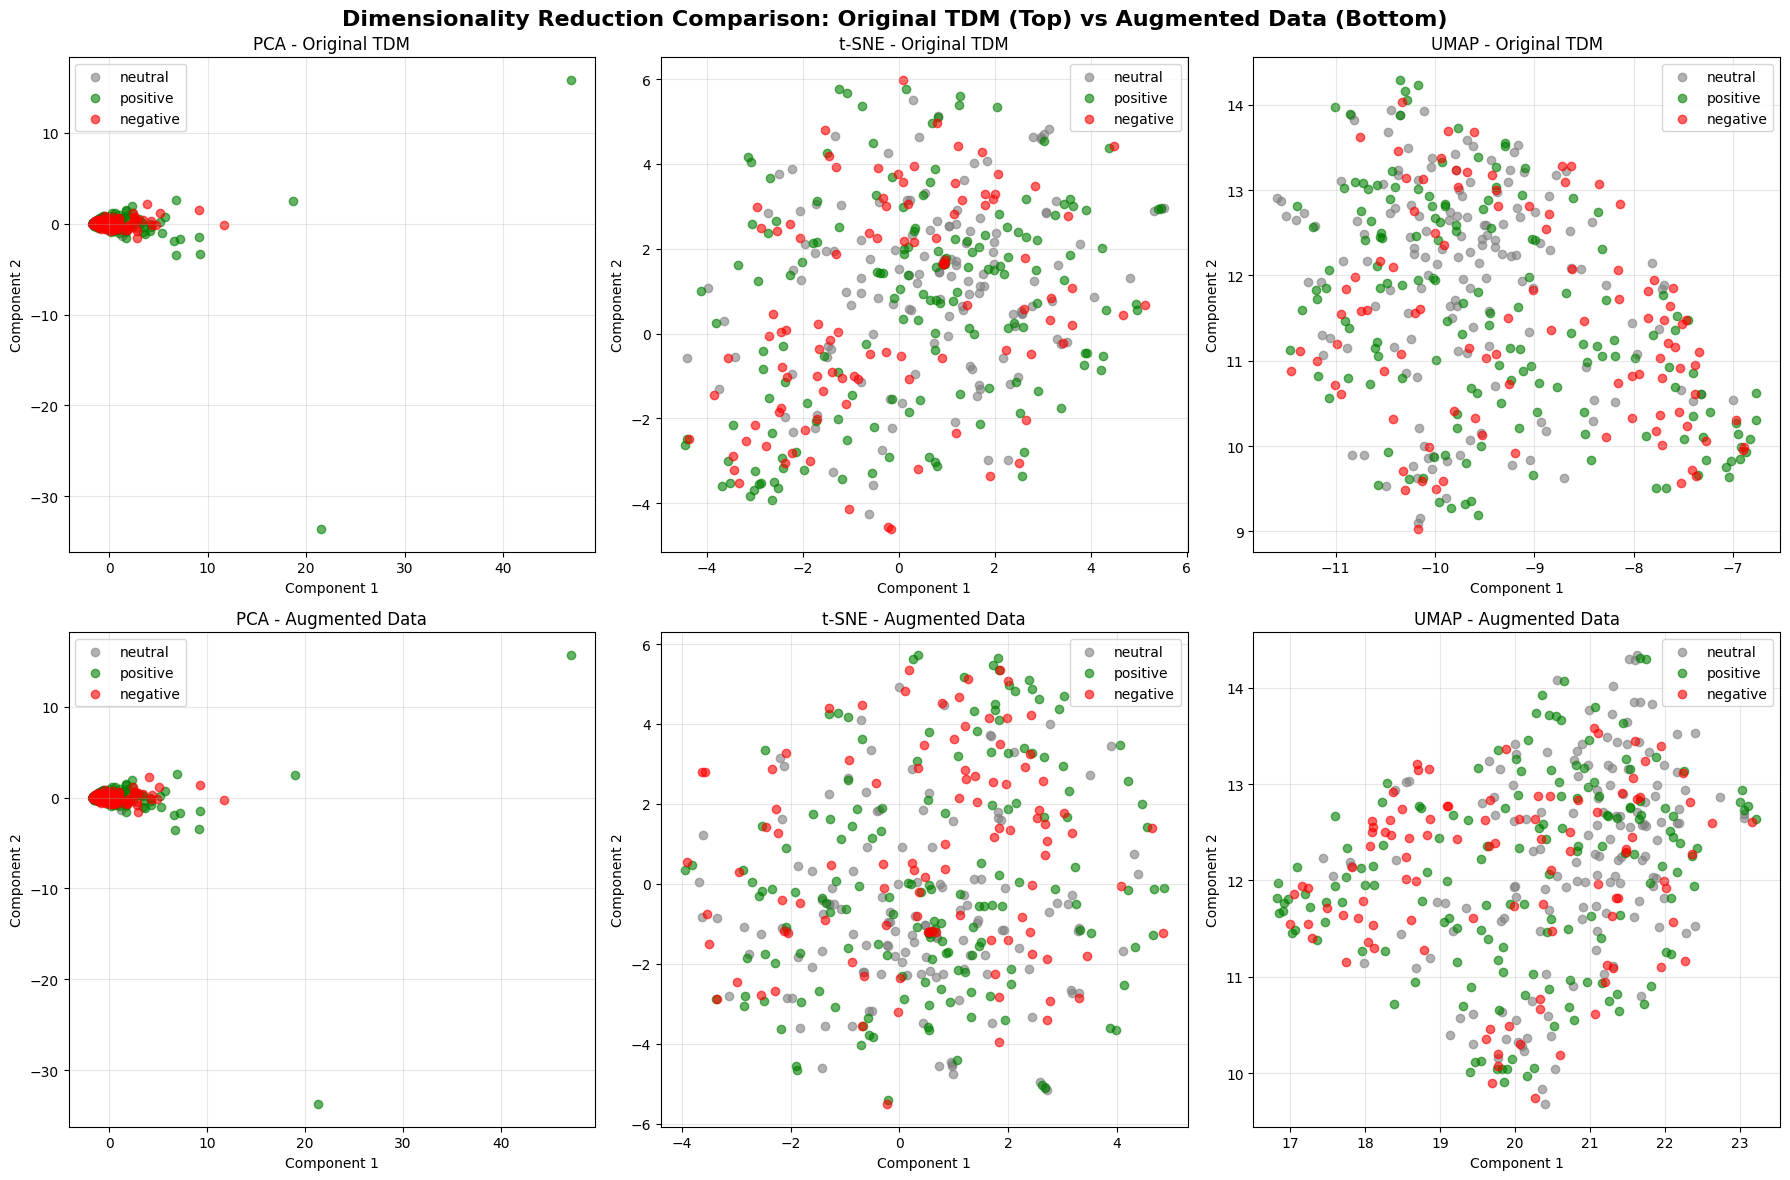

In [71]:
# Plot comparison: Original TDM vs Augmented Data
import matplotlib.pyplot as plt

# Set color map
color_map = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
colors = [color_map[cat] for cat in X['category_name']]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dimensionality Reduction Comparison: Original TDM (Top) vs Augmented Data (Bottom)', fontsize=16, fontweight='bold')

# Scatter plot function
def plot_scatter(ax, X_reduced, title, colors, categories):
    for category in categories:
        mask = X['category_name'] == category
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1],
                   c=color_map[category], marker='o', label=category, alpha=0.6)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend()
    ax.grid(alpha=0.3)

# Top row: Original TDM
plot_scatter(axes[0, 0], X_pca_tdm, 'PCA - Original TDM', colors, categories)
plot_scatter(axes[0, 1], X_tsne_tdm, 't-SNE - Original TDM', colors, categories)
plot_scatter(axes[0, 2], X_umap_tdm, 'UMAP - Original TDM', colors, categories)

# Bottom row: Augmented Data
plot_scatter(axes[1, 0], X_pca_aug, 'PCA - Augmented Data', colors, categories)
plot_scatter(axes[1, 1], X_tsne_aug, 't-SNE - Augmented Data', colors, categories)
plot_scatter(axes[1, 2], X_umap_aug, 'UMAP - Augmented Data', colors, categories)

plt.tight_layout()
plt.show()


**觀察結果：**

從降維視覺化可以看出：
- **PCA**: 線性降維方法，類別之間重疊嚴重
- **t-SNE, UMAP**: 非線性方法，能展現局部結構

## 6. Data Classification（資料分類）

接下來我們將使用 Naive Bayes 分類器來對情緒資料進行分類。


1. Naive Bayes 分類器 - 使用原始詞頻特徵（TDM）

準確率 (Accuracy): 0.3917

分類報告:
              precision    recall  f1-score   support

    negative     0.3676    0.5952    0.4545        42
     neutral     0.6667    0.1633    0.2623        49
    positive     0.3500    0.4828    0.4058        29

    accuracy                         0.3917       120
   macro avg     0.4614    0.4138    0.3742       120
weighted avg     0.4855    0.3917    0.3643       120



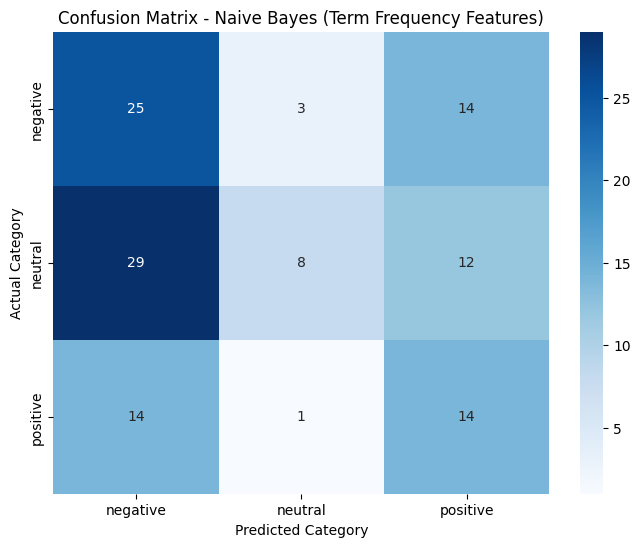

In [72]:
# 使用 MultinomialNB 進行分類（適合詞頻特徵）
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# 準備資料標籤
target_names = sorted(X['category_name'].unique())

print("="*80)
print("1. Naive Bayes 分類器 - 使用原始詞頻特徵（TDM）")
print("="*80)

# 分割訓練集和測試集 (70/30)
X_train_tdm, X_test_tdm, y_train, y_test = train_test_split(
    tdm_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 MultinomialNB
nb_tdm = MultinomialNB()
nb_tdm.fit(X_train_tdm, y_train)

# 預測
y_pred_tdm = nb_tdm.predict(X_test_tdm)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test, y_pred_tdm):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test, y_pred_tdm, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_tdm = confusion_matrix(y_test, y_pred_tdm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tdm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (Term Frequency Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()



2. Naive Bayes 分類器 - 使用擴增資料（詞頻 + Pattern 特徵）

準確率 (Accuracy): 0.3750

分類報告:
              precision    recall  f1-score   support

    negative     0.3623    0.5952    0.4505        42
     neutral     0.7273    0.1633    0.2667        49
    positive     0.3000    0.4138    0.3478        29

    accuracy                         0.3750       120
   macro avg     0.4632    0.3908    0.3550       120
weighted avg     0.4963    0.3750    0.3506       120



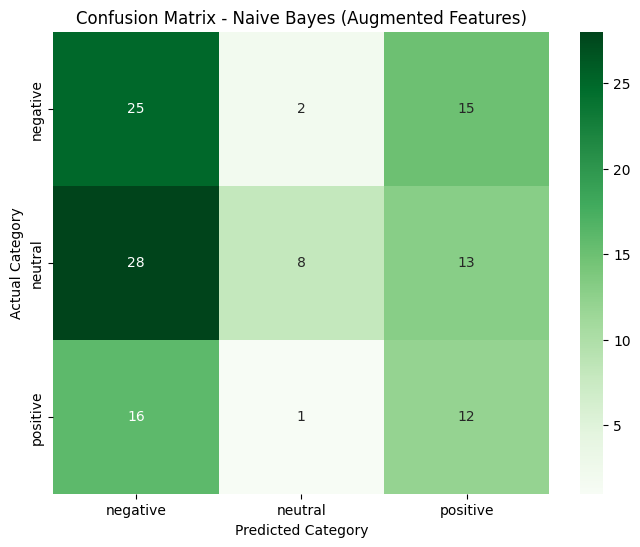

In [73]:
# 2. 使用擴增資料（詞頻 + Pattern 特徵）
print("\n" + "="*80)
print("2. Naive Bayes 分類器 - 使用擴增資料（詞頻 + Pattern 特徵）")
print("="*80)

# 分割訓練集和測試集
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 MultinomialNB
nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_aug = nb_aug.predict(X_test_aug)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test_aug, y_pred_aug):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (Augmented Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


### Decision Tree 分類器

除了 Naive Bayes，我們也使用 Decision Tree 分類器來進行比較。


Decision Tree 分類器 - 使用原始詞頻特徵（TDM）

準確率 (Accuracy): 0.4250

分類報告:
              precision    recall  f1-score   support

    negative     0.4222    0.4524    0.4368        42
     neutral     0.5682    0.5102    0.5376        49
    positive     0.2258    0.2414    0.2333        29

    accuracy                         0.4250       120
   macro avg     0.4054    0.4013    0.4026       120
weighted avg     0.4344    0.4250    0.4288       120



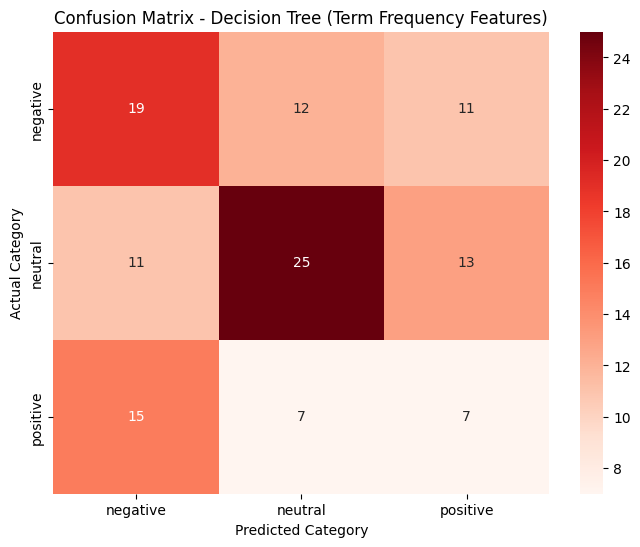

In [74]:
# Decision Tree 分類器 - 使用原始 TDM
from sklearn.tree import DecisionTreeClassifier

print("="*80)
print("Decision Tree 分類器 - 使用原始詞頻特徵（TDM）")
print("="*80)

# 訓練 Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tdm, y_train)

# 預測
y_pred_dt = dt_classifier.predict(X_test_tdm)

# 評估
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\n準確率 (Accuracy): {dt_accuracy:.4f}")
print(f"\n分類報告:")
print(classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree (Term Frequency Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


#### Exercise 24: 使用擴增資料訓練 Decision Tree

使用擴增資料（TDM + Pattern）訓練 Decision Tree，並比較性能是否有改善。


Exercise 24: Decision Tree - 使用擴增資料（詞頻 + Pattern 特徵）

準確率 (Accuracy): 0.3917

分類報告:
              precision    recall  f1-score   support

    negative     0.3810    0.3810    0.3810        42
     neutral     0.5750    0.4694    0.5169        49
    positive     0.2105    0.2759    0.2388        29

    accuracy                         0.3917       120
   macro avg     0.3888    0.3754    0.3789       120
weighted avg     0.4190    0.3917    0.4021       120



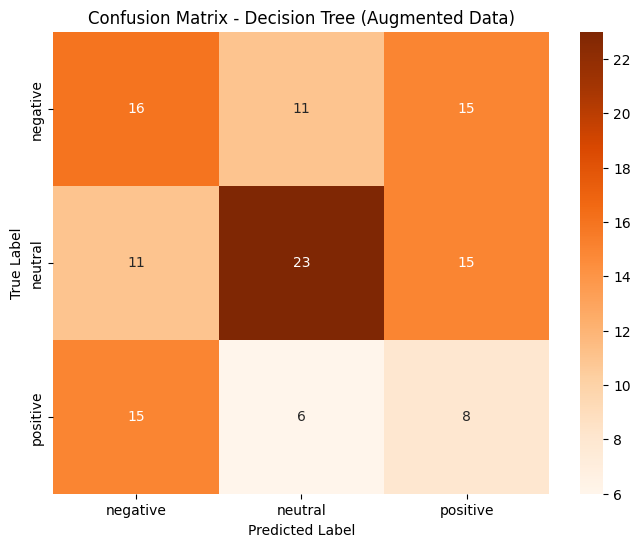

In [75]:
# Exercise 24: Decision Tree 使用擴增資料

print("="*80)
print("Exercise 24: Decision Tree - 使用擴增資料（詞頻 + Pattern 特徵）")
print("="*80)

# 訓練 Decision Tree with augmented data
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

# 評估
dt_aug_accuracy = accuracy_score(y_test_aug, y_pred_dt_aug)
print(f"\n準確率 (Accuracy): {dt_aug_accuracy:.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_dt_aug = confusion_matrix(y_test_aug, y_pred_dt_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_aug, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree (Augmented Data)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [76]:
dt_tdm_accuracy = accuracy_score(y_test, y_pred_dt)
nb_aug_accuracy = accuracy_score(y_test_aug, y_pred_aug)

print(f"\n1. Decision Tree (原始 TDM):     {dt_tdm_accuracy:.4f} ({dt_tdm_accuracy*100:.2f}%)")
print(f"2. Decision Tree (擴增資料):     {dt_aug_accuracy:.4f} ({dt_aug_accuracy*100:.2f}%)")
print(f"3. Naive Bayes (擴增資料):       {nb_aug_accuracy:.4f} ({nb_aug_accuracy*100:.2f}%)")

print(f"\n📈 擴增資料對 Decision Tree 的影響: {dt_aug_accuracy - dt_tdm_accuracy:+.4f}")
print(f"📉 Decision Tree vs Naive Bayes 差距: {nb_aug_accuracy - dt_aug_accuracy:.4f}")



1. Decision Tree (原始 TDM):     0.4250 (42.50%)
2. Decision Tree (擴增資料):     0.3917 (39.17%)
3. Naive Bayes (擴增資料):       0.3750 (37.50%)

📈 擴增資料對 Decision Tree 的影響: -0.0333
📉 Decision Tree vs Naive Bayes 差距: -0.0167


1. 擴增資料讓 Decision Tree 性能下降了 3.33%

2. Decision Tree (擴增) 優於 Naive Bayes (擴增)？

---

## 作業額外要求部分

### 第三部分：TF-IDF 特徵與分類器

根據作業要求，我們需要：
1. 使用 TF-IDF 特徵建立文檔矩陣
2. 使用 TF-IDF 和詞頻特徵分別建立 Naive Bayes 分類器
3. 比較兩種特徵的效果


In [79]:
# 建立 TF-IDF 特徵
from sklearn.feature_extraction.text import TfidfVectorizer

# 建立 TF-IDF 向量器
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])

# 轉換為 DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), 
    columns=tfidf_vect.get_feature_names_out(),
    index=X.index
)

print(f"TF-IDF 矩陣形狀: {tfidf_df.shape}")
print(f"文檔數量: {tfidf_df.shape[0]}")
print(f"詞彙數量: {tfidf_df.shape[1]}")

TF-IDF 矩陣形狀: (400, 2758)
文檔數量: 400
詞彙數量: 2758


3. Naive Bayes 分類器 - 使用 TF-IDF 特徵

準確率 (Accuracy): 0.4000

分類報告:
              precision    recall  f1-score   support

    negative     0.3699    0.6429    0.4696        42
     neutral     0.7857    0.2245    0.3492        49
    positive     0.3030    0.3448    0.3226        29

    accuracy                         0.4000       120
   macro avg     0.4862    0.4041    0.3805       120
weighted avg     0.5235    0.4000    0.3849       120



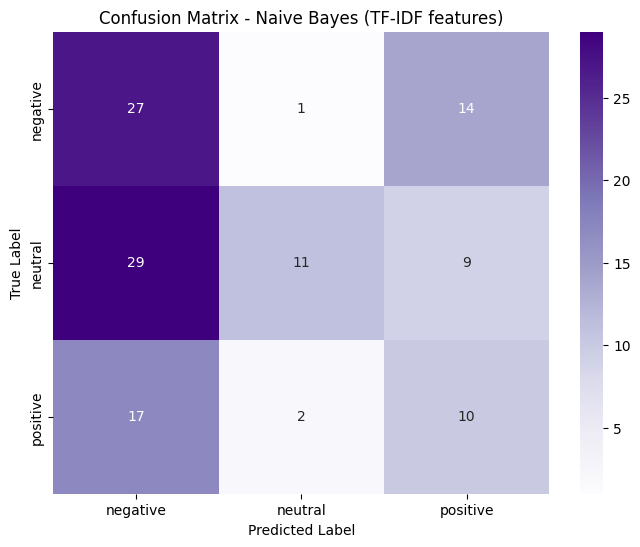

In [81]:
# 3. 使用 TF-IDF 特徵的 Naive Bayes 分類器

from sklearn.naive_bayes import GaussianNB

print("="*80)
print("3. Naive Bayes 分類器 - 使用 TF-IDF 特徵")
print("="*80)

# 分割訓練集和測試集
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 GaussianNB（適合連續值特徵）
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# 預測
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test_tfidf, y_pred_tfidf):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Purples', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (TF-IDF features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



4. Naive Bayes 分類器 - 使用 TF-IDF + Pattern 特徵
TF-IDF + Pattern 矩陣形狀: (400, 2853)

準確率 (Accuracy): 0.4417

分類報告:
              precision    recall  f1-score   support

    negative     0.3924    0.7381    0.5124        42
     neutral     0.9091    0.2041    0.3333        49
    positive     0.4000    0.4138    0.4068        29

    accuracy                         0.4417       120
   macro avg     0.5672    0.4520    0.4175       120
weighted avg     0.6052    0.4417    0.4138       120



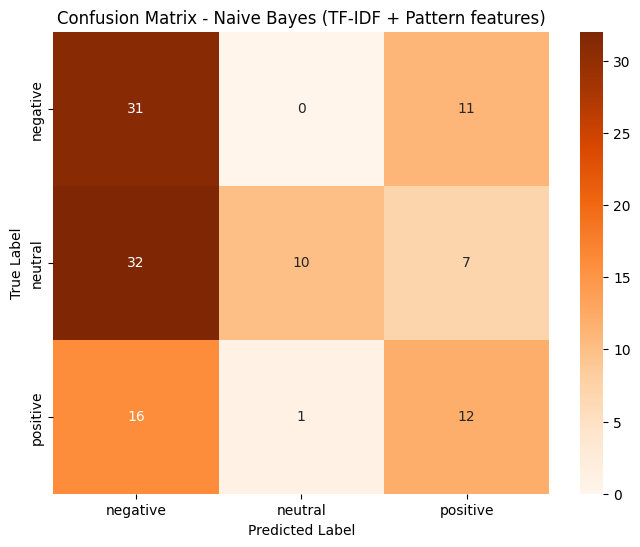

In [82]:
# 4. 使用 TF-IDF + Pattern 特徵的分類器
print("\n" + "="*80)
print("4. Naive Bayes 分類器 - 使用 TF-IDF + Pattern 特徵")
print("="*80)

# 合併 TF-IDF 和 Pattern 特徵
tfidf_augmented_df = pd.concat([tfidf_df, pattern_matrix], axis=1)

print(f"TF-IDF + Pattern 矩陣形狀: {tfidf_augmented_df.shape}")

# 分割訓練集和測試集
X_train_tfidf_aug, X_test_tfidf_aug, y_train_tfidf_aug, y_test_tfidf_aug = train_test_split(
    tfidf_augmented_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 GaussianNB
nb_tfidf_aug = GaussianNB()
nb_tfidf_aug.fit(X_train_tfidf_aug, y_train_tfidf_aug)

# 預測
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_test_tfidf_aug)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_tfidf_aug, y_pred_tfidf_aug, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_tfidf_aug = confusion_matrix(y_test_tfidf_aug, y_pred_tfidf_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf_aug, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (TF-IDF + Pattern features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



所有分類器效能比較
                                        方法      準確率
             GaussianNB + TF-IDF + Pattern 0.441667
                       GaussianNB + TF-IDF 0.400000
          MultinomialNB + Count Vectorizer 0.391667
MultinomialNB + Count Vectorizer + Pattern 0.375000


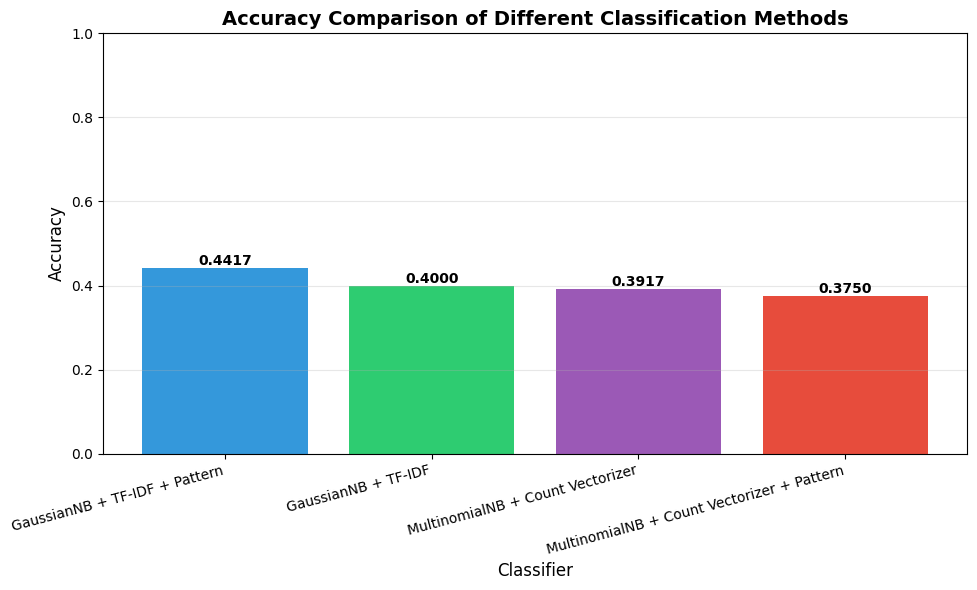

In [83]:
# 彙總所有分類器的結果進行比較
results = {
    '方法': [
        'MultinomialNB + Count Vectorizer',
        'MultinomialNB + Count Vectorizer + Pattern',
        'GaussianNB + TF-IDF',
        'GaussianNB + TF-IDF + Pattern'
    ],
    '準確率': [
        accuracy_score(y_test, y_pred_tdm),
        accuracy_score(y_test_aug, y_pred_aug),
        accuracy_score(y_test_tfidf, y_pred_tfidf),
        accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('準確率', ascending=False)

print("\n" + "="*80)
print("所有分類器效能比較")
print("="*80)
print(results_df.to_string(index=False))

# 繪製比較圖
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(results_df)), results_df['準確率'],
               color=['#3498db', '#2ecc71', '#9b59b6', '#e74c3c'])
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Different Classification Methods', fontsize=14, fontweight='bold')
plt.xticks(range(len(results_df)), results_df['方法'], rotation=15, ha='right')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# 在每個長條上標註數值
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### 實驗結果總結

根據上述實驗,我們比較了四種不同的分類方法:

1. **MultinomialNB + Count Vectorizer**:使用詞頻向量化和多項式樸素貝葉斯分類器
2. **MultinomialNB + Count Vectorizer + Pattern**:在詞頻基礎上加入頻繁模式特徵
3. **GaussianNB + TF-IDF**:使用 TF-IDF 向量化和高斯樸素貝葉斯分類器
4. **GaussianNB + TF-IDF + Pattern**:在 TF-IDF 基礎上加入頻繁模式特徵

- 從準確率可以看出,TF-IDF的方法相對於 Count Vectorizer較好
- 加入頻繁模式(Pattern)特徵對分類效能也有較好的影響

兩種貝葉斯分類器的差異：
- **MultinomialNB**：適用於離散特徵（利如詞頻計數），常用於文本分類
- **GaussianNB**：適用於連續特徵，假設特徵為常態分布，適合 TF-IDF 等連續值特徵
 
何時使用特徵增強：
- 當基礎特徵無法充分捕捉文本模式時
- 實驗結果顯示，加入頻繁模式特徵可提升分類準確率時
- 在小資料集上時


---

### 第四部分：數據預處理的改進討論

在本次實驗中，我們對 Reddit 股票情緒資料集進行了一系列預處理。


發現的問題與不足
 
在這次實驗中，我發現了幾個資料預處理上的問題。首先是資料量的問題，原始資料集只有 847 筆資料，去重後剩下 824 筆，而我們實際只使用了 400 筆樣本。這樣的資料量相對較小，可能會影響模型的泛化能力和穩健性。
 
在文本預處理方面，我認為還有許多可以改進的地方。例如，我們沒有移除 URL、特殊字符和表情符號，也沒有處理 Reddit 上常見的縮寫和網路用語。此外，我們也沒有進行詞幹提取，停用詞的過濾也只是依賴簡單的頻率統計。
 
在特徵選擇方面，我們使用的方法比較簡單，只透過頻率統計來過濾詞彙（保留前 5%，移除後 1%），可能會不小心移除一些低頻但具有判別力的詞彙。
  
在資料探索方面，我們沒有深入分析類別分布是否平衡、文本長度的分布情況，以及情緒詞彙的使用狀況，這些都是可以進一步改進的地方。
